# Playground / LeNet

Here we use LeNet as an example to show how to train a model in TensorFlow.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
print(tf.config.experimental.list_physical_devices('GPU'))

[]


In [3]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

print(train_imgs.shape)  # (60000, 28, 28)

(60000, 28, 28)


In [4]:
models = models.Sequential(
    [
        layers.Conv2D(
            filters=6,
            kernel_size=5,
            activation="sigmoid",
            padding="same",
        ),
        layers.AvgPool2D(pool_size=2, strides=2),
        layers.Conv2D(
            filters=16,
            kernel_size=5,
            activation="sigmoid",
            padding="valid",
        ),
        layers.AvgPool2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(120, activation="sigmoid"),
        layers.Dense(84, activation="sigmoid"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [5]:
X = tf.random.uniform((1, 28, 28, 1))
for layer in models.layers:
    X = layer(X)
    print(layer.__class__.__name__, "output shape:\t", X.shape)

Conv2D output shape:	 (1, 28, 28, 6)
AveragePooling2D output shape:	 (1, 14, 14, 6)
Conv2D output shape:	 (1, 10, 10, 16)
AveragePooling2D output shape:	 (1, 5, 5, 16)
Flatten output shape:	 (1, 400)
Dense output shape:	 (1, 120)
Dense output shape:	 (1, 84)
Dense output shape:	 (1, 10)


In [6]:
# training:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
train_imgs = train_imgs.astype("float32") / 255
test_imgs = test_imgs.reshape((10000, 28, 28, 1))
test_imgs = test_imgs.astype("float32") / 255
train_labels_ = to_categorical(train_labels)
test_labels_ = to_categorical(test_labels)

models.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = models.fit(
    train_imgs,
    train_labels_,
    epochs=20,
    batch_size=128,
    validation_data=(test_imgs, test_labels_),
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.2700 - loss: 2.0008 - val_accuracy: 0.8641 - val_loss: 0.5076
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8787 - loss: 0.4315 - val_accuracy: 0.9188 - val_loss: 0.2758
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9210 - loss: 0.2627 - val_accuracy: 0.9407 - val_loss: 0.1938
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9413 - loss: 0.1927 - val_accuracy: 0.9482 - val_loss: 0.1610
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9536 - loss: 0.1529 - val_accuracy: 0.9630 - val_loss: 0.1234
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9609 - loss: 0.1269 - val_accuracy: 0.9646 - val_loss: 0.1162
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9660 - loss: 0.1097 - val_accuracy: 0.9738 - val_loss: 0.0890
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9703 - loss: 0.0950 - val_accu

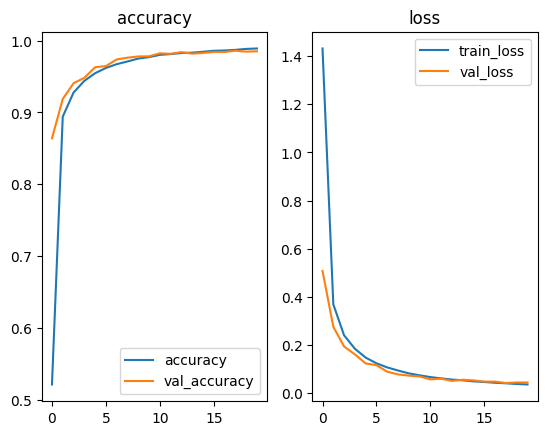

In [8]:
# plot:
plt.subplot(121)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")
_ = plt.legend()
plt.subplot(122)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
_ = plt.legend()